# Redes Neuronales

## Dependencias

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

## Carga de datos

In [2]:
# Cargar el dataset de ejemplo que está en Keras
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_val, y_val) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Shapes

In [3]:
X_train.shape

(404, 13)

In [4]:
y_train.shape

(404,)

## Arquitectura de la Red Neuronal

In [5]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con la entrada siendo la cantidad de features
    layers.Dense(32, activation='relu'),  # Capa oculta
    layers.Dense(1)  # Capa de salida (el precio a predecir)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

## Compilar el modelo

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Entrenamiento

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 392.4059 - mae: 15.2727 - val_loss: 96.6154 - val_mae: 7.8089
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 117.1436 - mae: 7.8414 - val_loss: 80.3893 - val_mae: 6.3961
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 89.7674 - mae: 6.6629 - val_loss: 72.2313 - val_mae: 6.2842
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 78.7913 - mae: 6.0907 - val_loss: 64.2210 - val_mae: 5.8467
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77.1370 - mae: 6.5511 - val_loss: 67.7169 - val_mae: 6.5377
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81.8473 - mae: 6.9111 - val_loss: 64.6603 - val_mae: 5.7073
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 76.8634 - mae: 5.7847 - val_loss: 57.7926 - val_mae: 5.8204
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 57.5546 - mae: 5.6506 - val_loss: 57.5809 - val_mae: 5.4966
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━

## Evaluacion

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_mae = history.history['mae']
    val_mae = history.history['val_mae']

    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Pérdida en entrenamiento')
    plt.plot(epochs, val_loss, 'r-', label='Pérdida en validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (Loss)')
    plt.title('Curva de pérdida en entrenamiento y validación')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_mae, 'orange', label='MAE en entrenamiento')
    plt.plot(epochs, val_mae, 'green', label='MAE en validación')
    plt.xlabel('Épocas')
    plt.ylabel('MAE (Error Absoluto Medio)')
    plt.title('Curva de MAE en entrenamiento y validación')
    plt.legend()

    plt.tight_layout()
    plt.show()

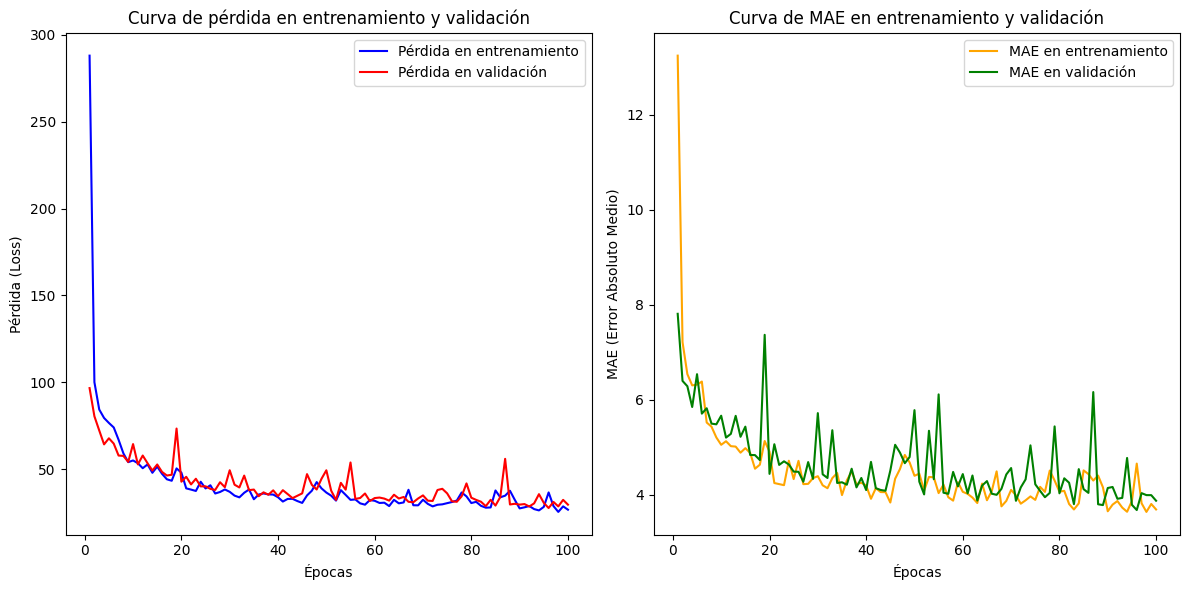

In [10]:
plot_training_history(history)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
y_pred = model.predict(X_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [13]:
mean_absolute_error(y_val, y_pred)

3.8738012482138244

## Segundo modelo

In [14]:
model = keras.Sequential([
    layers.Dense(500, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(200, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, verbose=False)

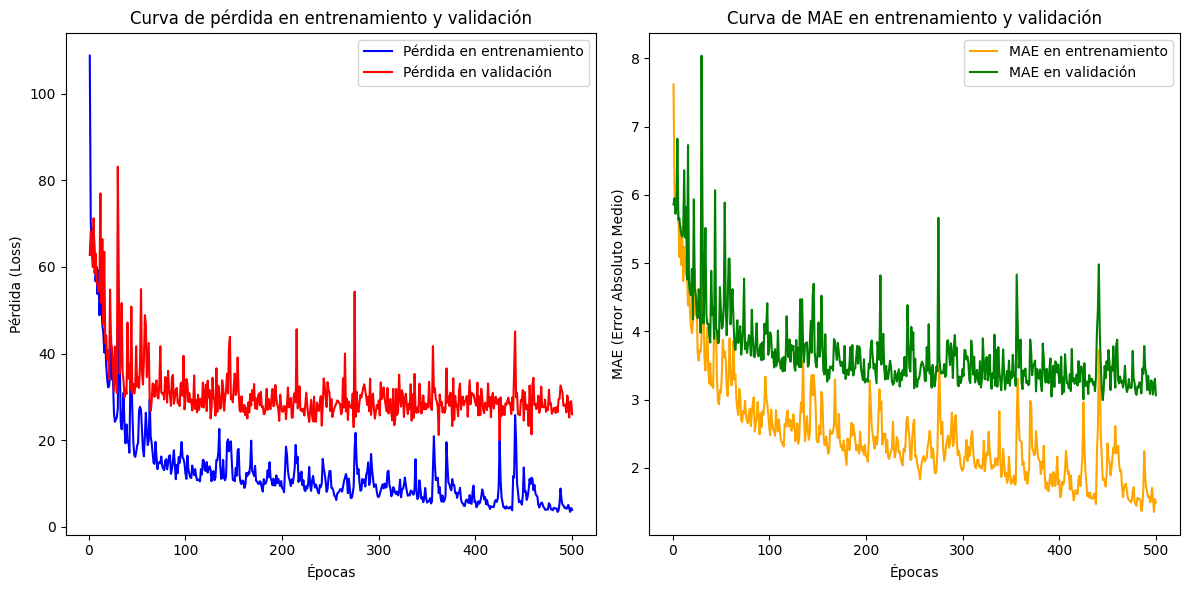

In [17]:
plot_training_history(history)

## Tercer modelo (con regularización)

In [18]:
model = keras.Sequential([
    layers.Dense(500, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(200, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, callbacks=[early_stopping], verbose=True)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 695.2297 - mae: 19.3554 - val_loss: 79.4771 - val_mae: 6.9272
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 160.9034 - mae: 10.0043 - val_loss: 83.3028 - val_mae: 6.5229
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 135.2044 - mae: 8.8179 - val_loss: 76.4619 - val_mae: 6.3031
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 132.9250 - mae: 8.3174 - val_loss: 69.0508 - val_mae: 6.0700
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 112.8680 - mae: 8.0405 - val_loss: 74.3473 - val_mae: 6.2022
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 104.7047 - mae: 7.4425 - val_loss: 69.4964 - val_mae: 6.0607
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 108.3770 - mae: 7.9541 - val_loss: 60.2034 - val_mae: 5.9019
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 113.7064 - mae: 8.3056 - val_loss: 110.8872 - val_mae: 7.9722
Epoch 9/500
13/13 ━━━━━━━━━━━

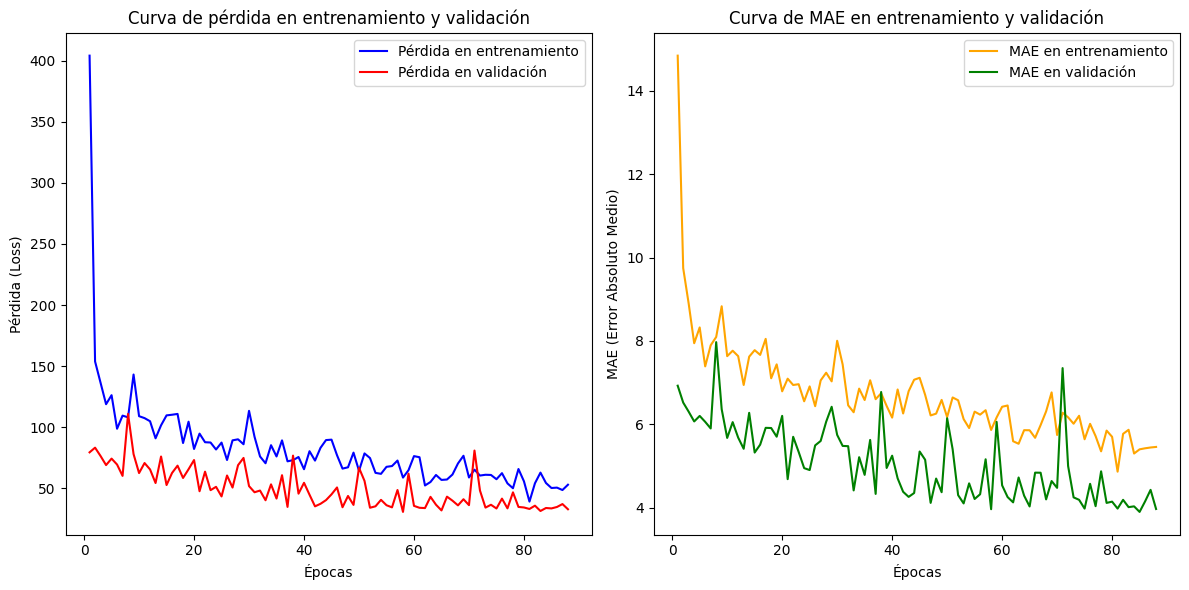

In [21]:
plot_training_history(history)